In [2]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import subplots
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import  (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# (a)

Auto = pd.read_csv('Auto.csv')
mpg_median = Auto['mpg'].median()
Auto['mpg01'] = (Auto.mpg > mpg_median).astype('int')
Auto


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


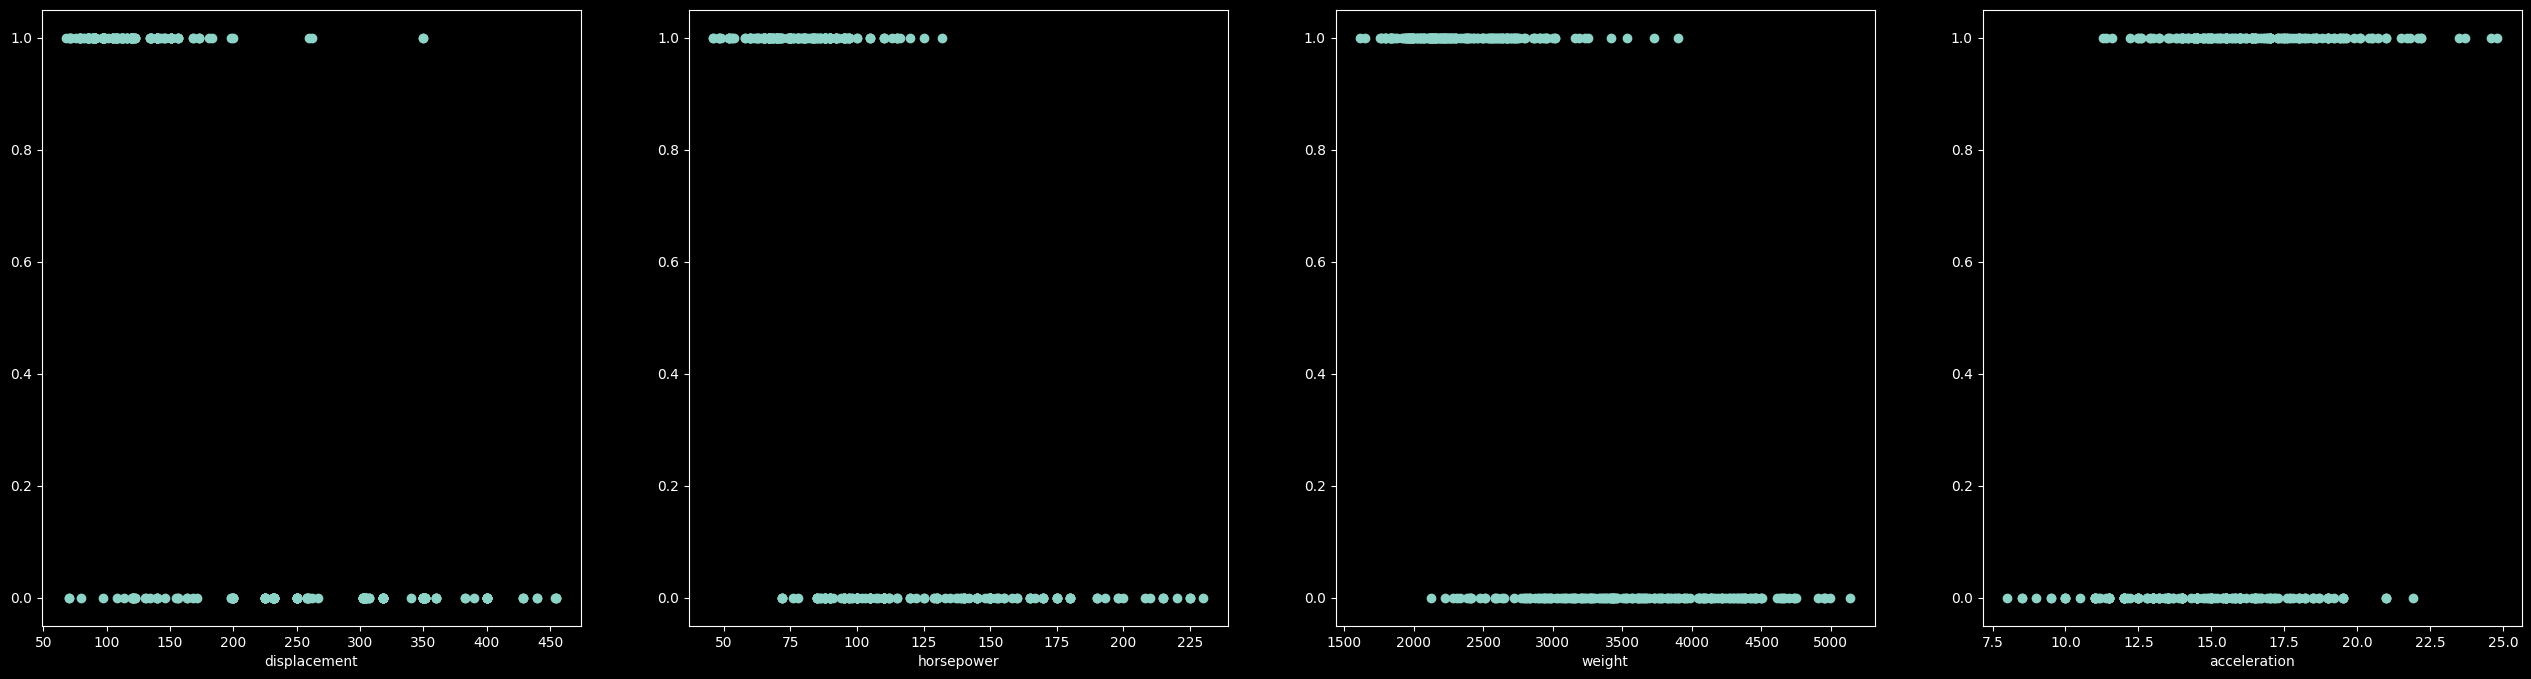

In [4]:
# (b)

y = Auto['mpg01']
columns = ['displacement', 'horsepower', 'weight', 'acceleration']

fig, axes = subplots(ncols=4, figsize=(32, 8))

for i in range(len(columns)):    
    axes[i].scatter(Auto[columns[i]], y, marker='o')
    axes[i].set_xlabel(columns[i])

# 'cylinders' columns excluded, because I believe it's value related to 'displacement' and 'horsepower'
#
# We are looking for graphs where for given x-value it's y value will be exclusively 1 or 0 (no overllapping)
# Vusually, 'horsepower' and 'weight' are our best prospects.

In [5]:
# (c)

x_train, x_test, y_train, y_test = train_test_split(Auto[['horsepower', 'weight']], y, test_size=0.2)

In [6]:
# (d)

def d():
    lda = LDA(store_covariance=True)        
    lda.fit(x_train, y_train)            
    y_pred = lda.predict(x_test)    
    #lda.score(x_test, y_test)
    return np.mean(y_test == y_pred)
    
# print the classification accuracy 
accuracy = d()

print('accuracy: {0}, test error: {1}'.format(accuracy, 1 - accuracy))


accuracy: 0.9493670886075949, test error: 0.05063291139240511


In [7]:
# (e)

def e():
    qda = QDA(store_covariance=True) 
    qda.fit(x_train, y_train)
    y_pred = qda.predict(x_test)
    return np.mean(y_test == y_pred)

# print the classification accuracy 
accuracy = e()

print('accuracy: {0}, test error: {1}'.format(accuracy, 1 - accuracy))

accuracy: 0.9240506329113924, test error: 0.07594936708860756


In [8]:
# (f)

def f():
    clf = LogisticRegression(random_state=0).fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    return np.mean(y_test == y_pred)    

# classification accuracy 
accuracy = f()

print('accuracy: {0}, test error: {1}'.format(accuracy, 1 - accuracy))


accuracy: 0.9240506329113924, test error: 0.07594936708860756


In [9]:
# (g)

def g():
    nb = GaussianNB()
    nb.fit(x_train, y_train)
    y_pred = nb.predict(x_test)
    return np.mean(y_test == y_pred)

# classification accuracy 
accuracy = g()

print('accuracy: {0}, test error: {1}'.format(accuracy, 1 - accuracy))


accuracy: 0.9240506329113924, test error: 0.07594936708860756


In [10]:
# (h)

for n_n in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=n_n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    success_rate = np.mean(y_test == y_pred)
    print('neighbors: {0:4}, success rate: {1}'.format(n_n, success_rate))

# best K = 41 .. 44, with success rate 91.1%

neighbors:    1, success rate: 0.8987341772151899
neighbors:    2, success rate: 0.9240506329113924
neighbors:    3, success rate: 0.9113924050632911
neighbors:    4, success rate: 0.8987341772151899
neighbors:    5, success rate: 0.8987341772151899
neighbors:    6, success rate: 0.9113924050632911
neighbors:    7, success rate: 0.9240506329113924
neighbors:    8, success rate: 0.9240506329113924
neighbors:    9, success rate: 0.9113924050632911
neighbors:   10, success rate: 0.9113924050632911
neighbors:   11, success rate: 0.9113924050632911
neighbors:   12, success rate: 0.9113924050632911
neighbors:   13, success rate: 0.9113924050632911
neighbors:   14, success rate: 0.9113924050632911
neighbors:   15, success rate: 0.9113924050632911
neighbors:   16, success rate: 0.9113924050632911
neighbors:   17, success rate: 0.9113924050632911
neighbors:   18, success rate: 0.9113924050632911
neighbors:   19, success rate: 0.9113924050632911
neighbors:   20, success rate: 0.9113924050632911
